In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("E:\DataScience\Cancer\cancer patient data sets.csv")

In [3]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
data.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [5]:
data.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [7]:
data.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [8]:
data.shape

(1000, 26)

In [9]:
data.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [10]:
data['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [11]:
data['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

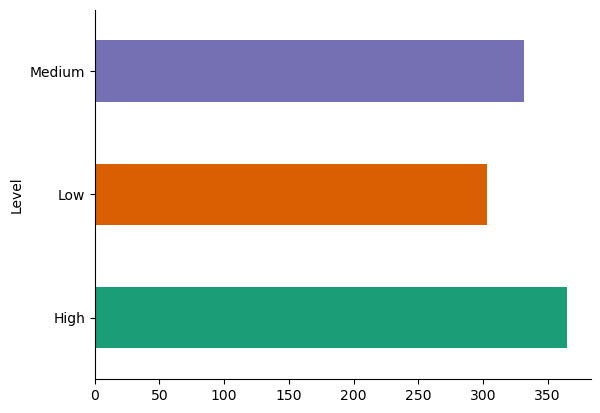

In [12]:
data.groupby('Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
data.drop(['index','Patient Id'],axis=1,inplace=True)

In [14]:
data['Level'] = data['Level'].replace({'Low': 0, 'Medium': 1,'High':2})

C:\Users\chara\AppData\Local\Temp\ipykernel_24864\3150681502.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Level'] = data['Level'].replace({'Low': 0, 'Medium': 1,'High':2})


In [15]:
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


<Axes: >

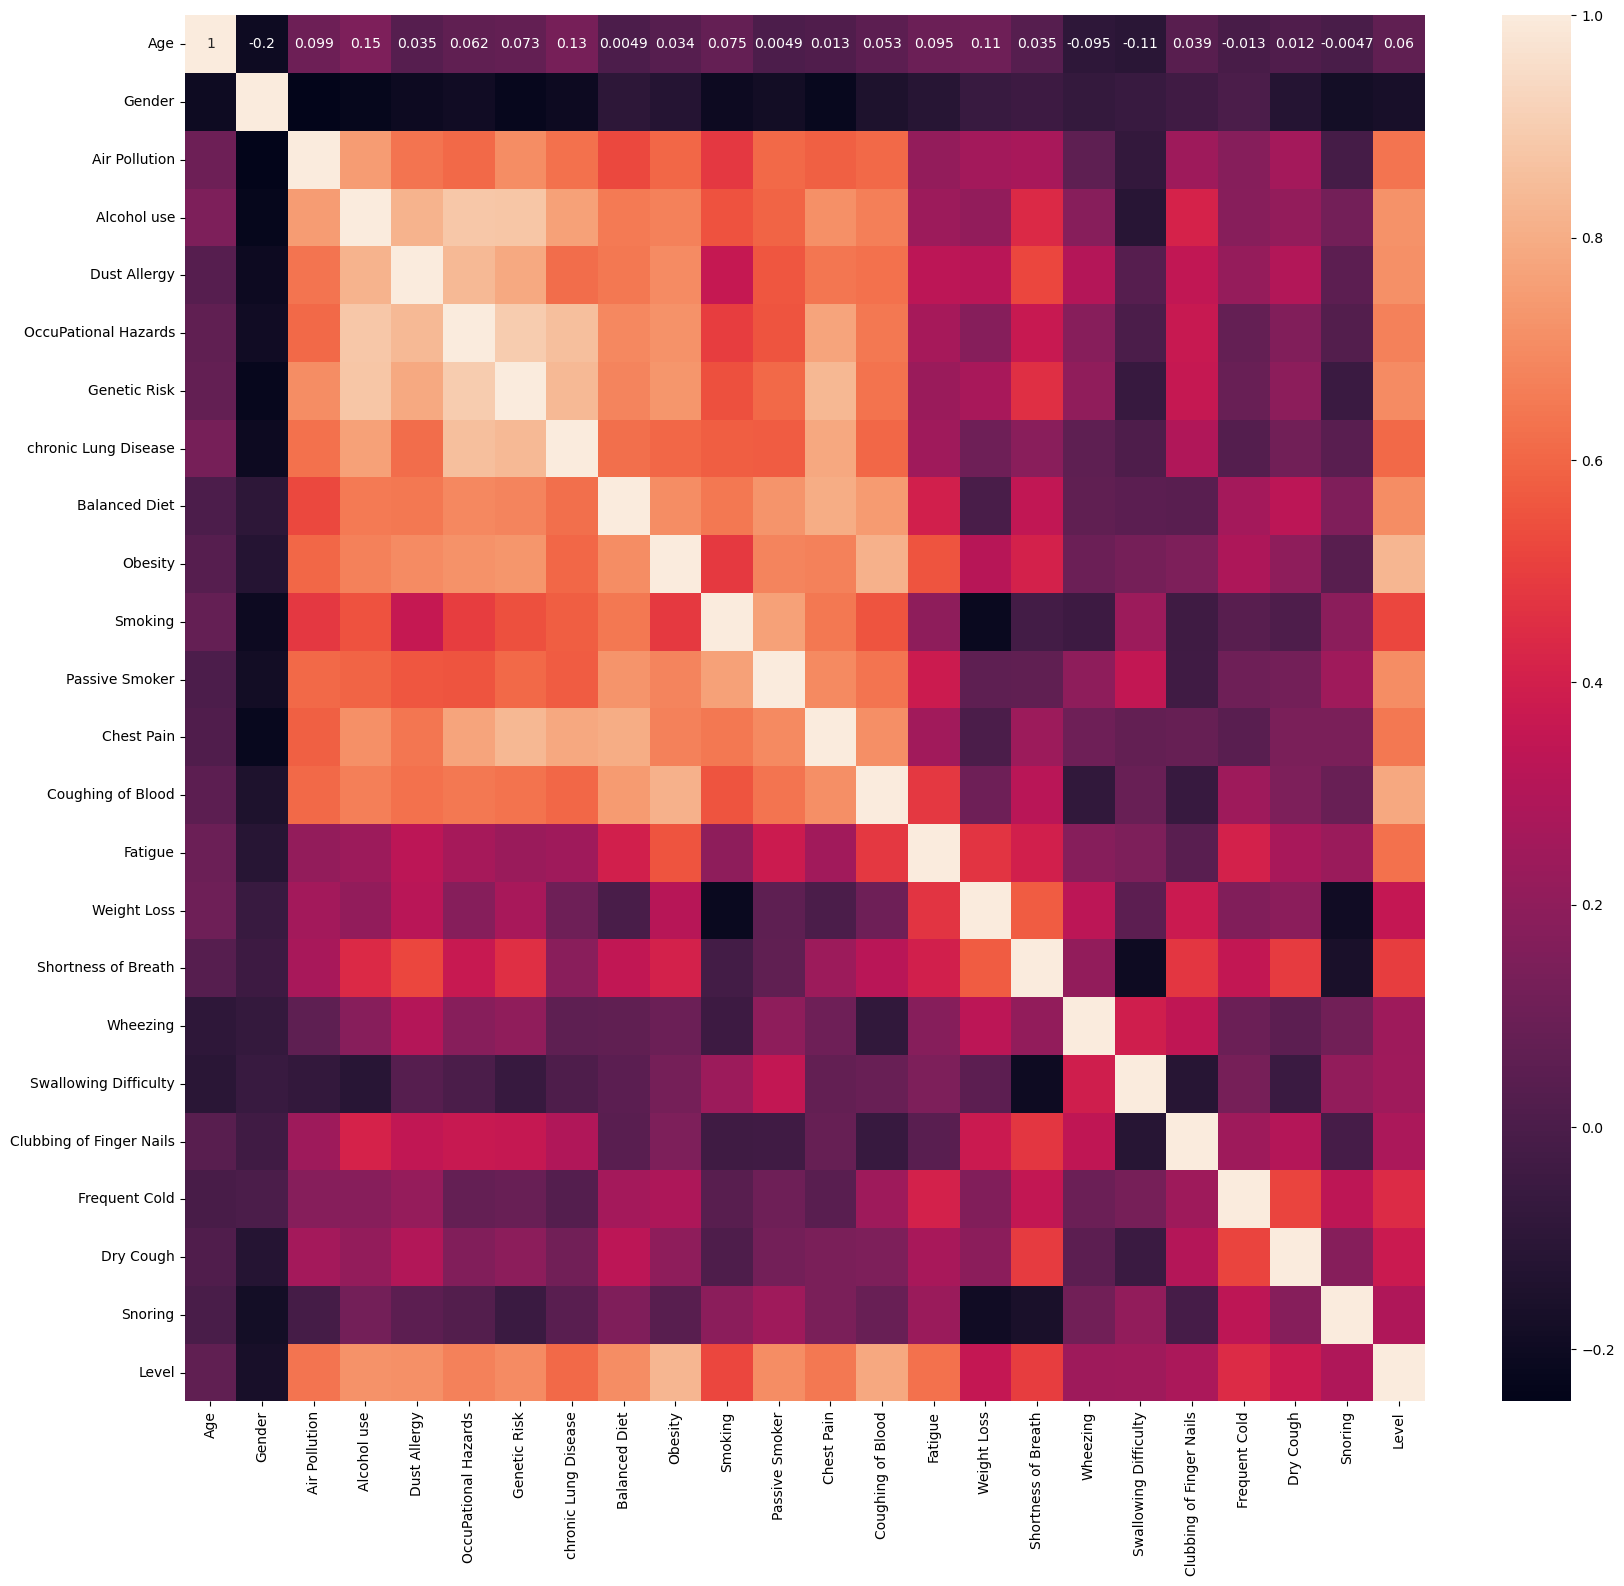

In [16]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True)

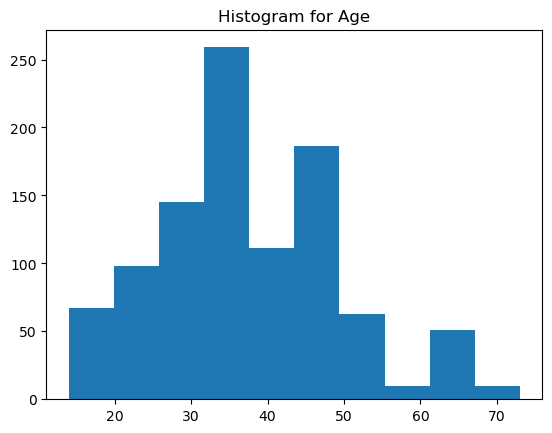

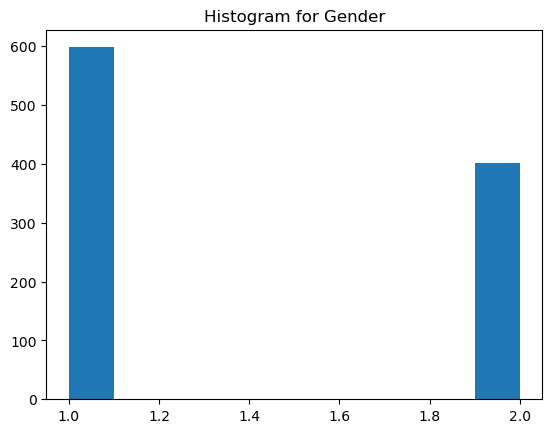

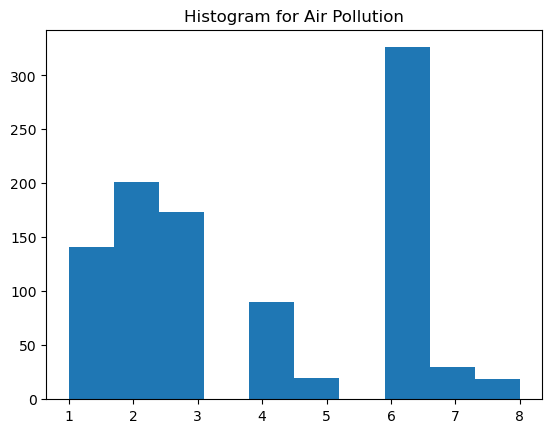

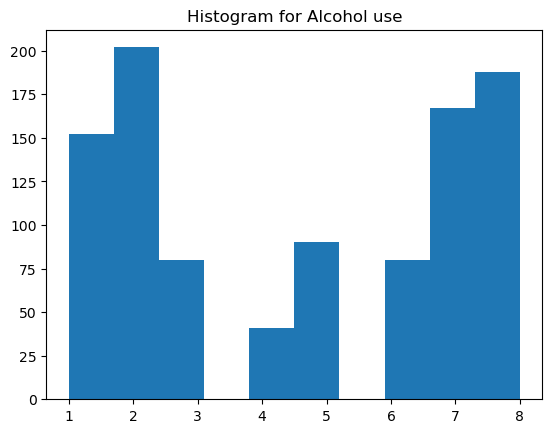

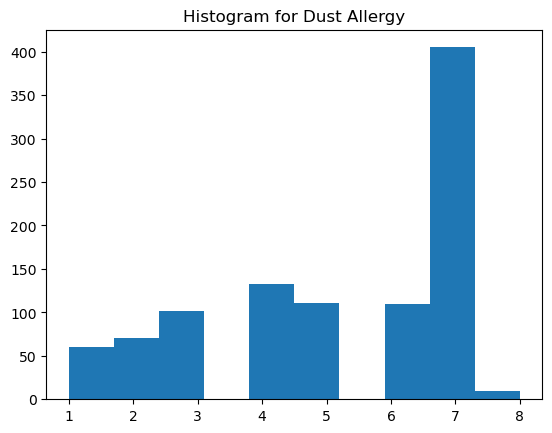

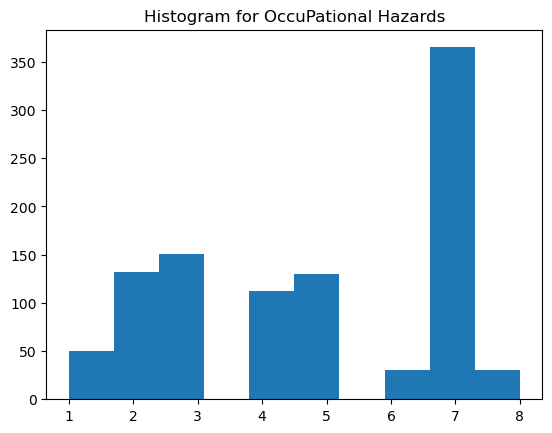

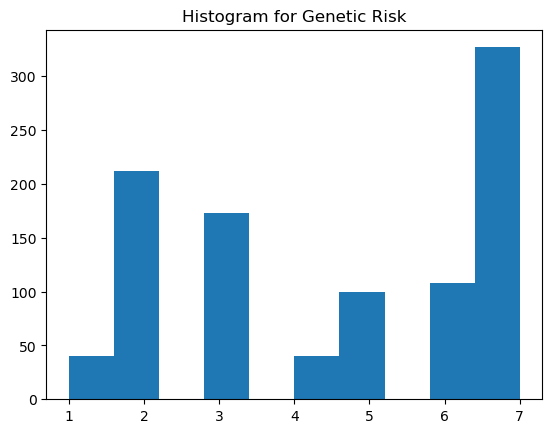

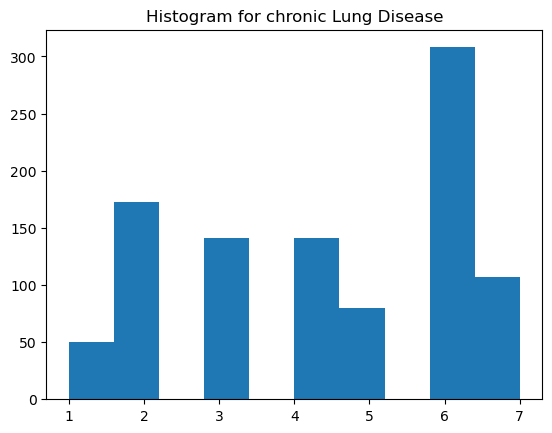

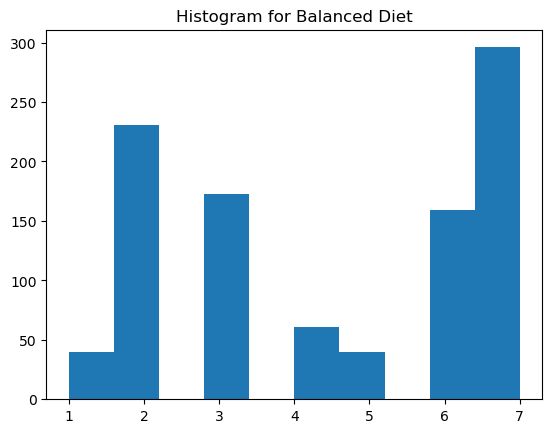

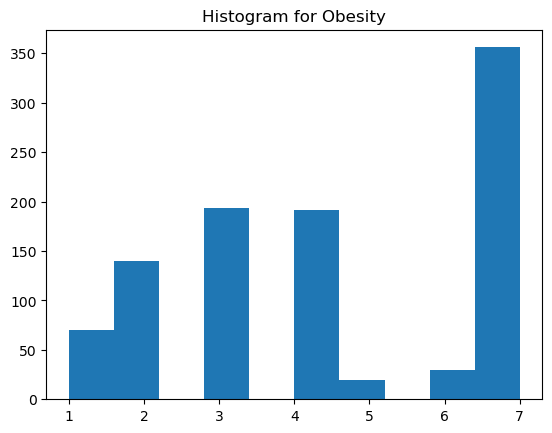

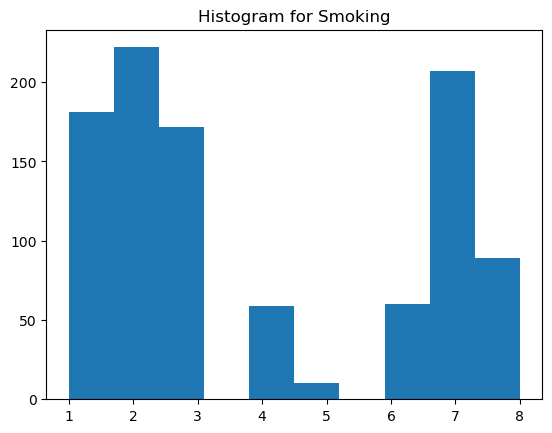

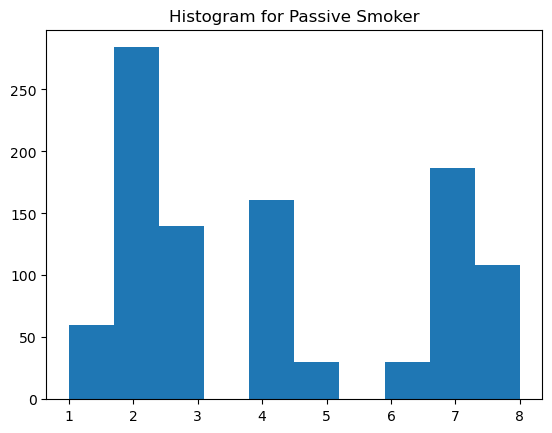

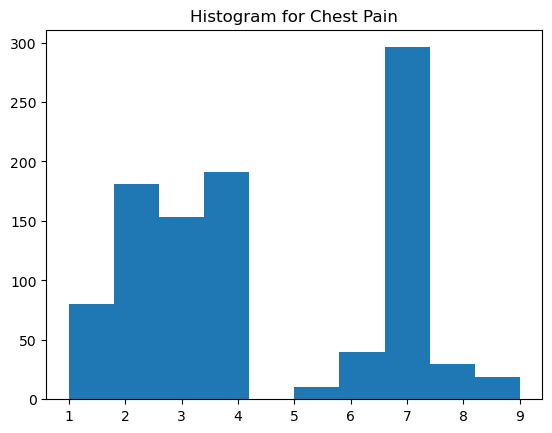

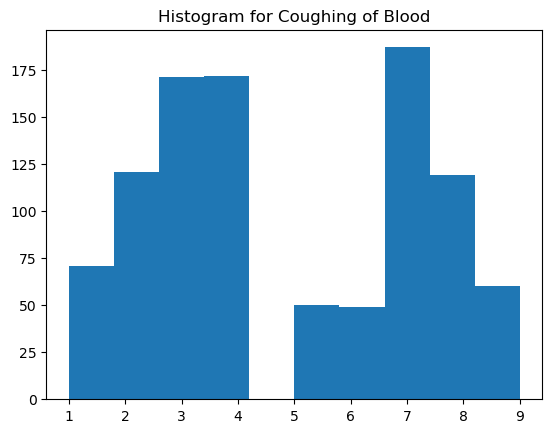

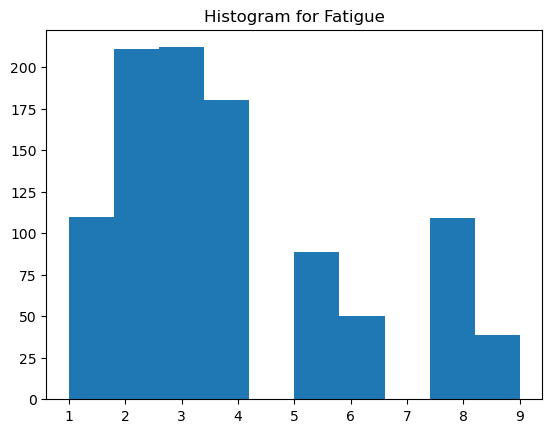

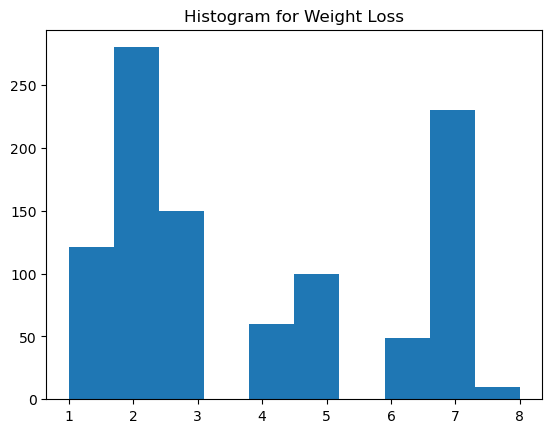

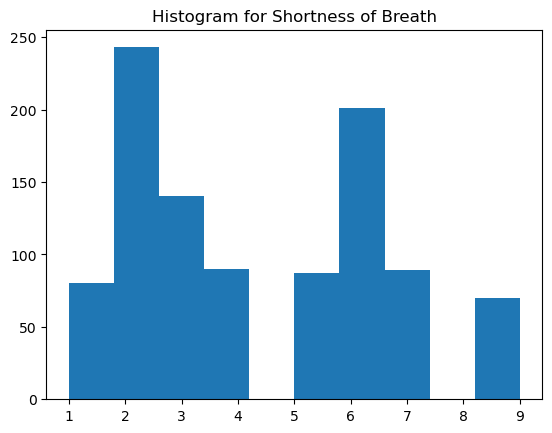

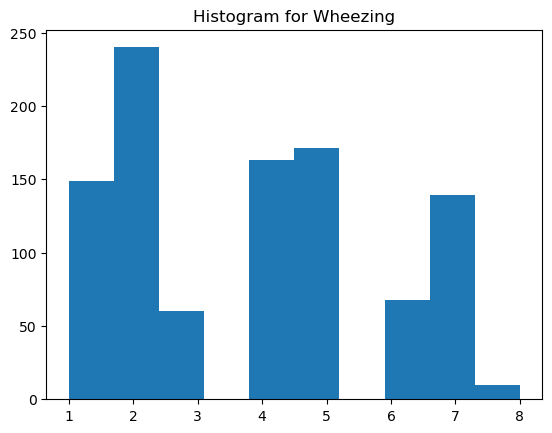

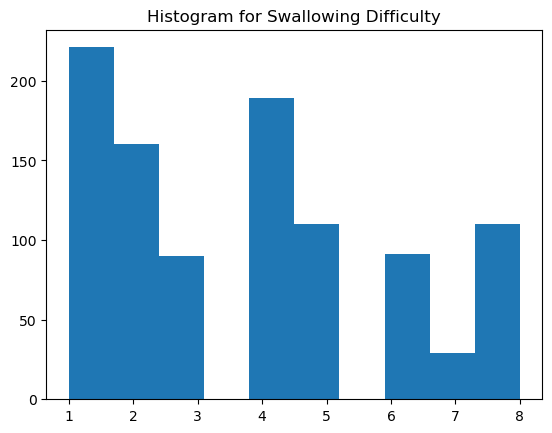

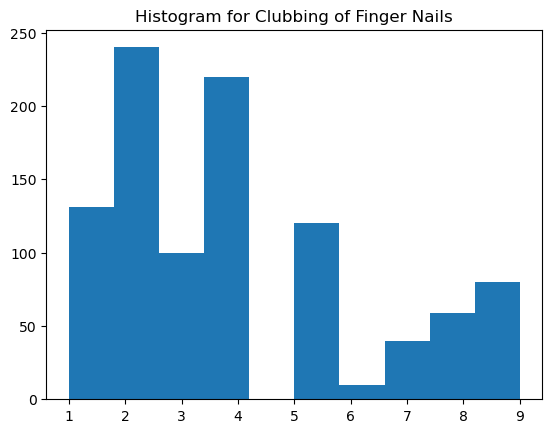

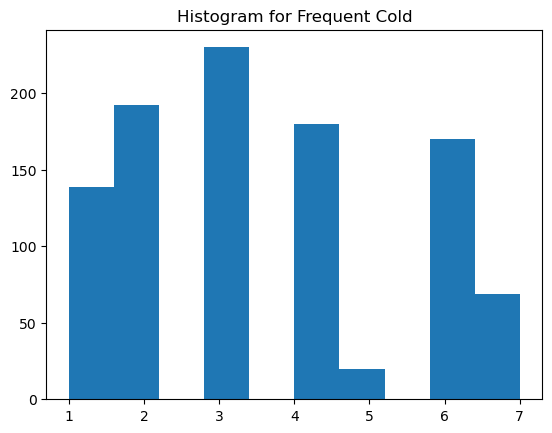

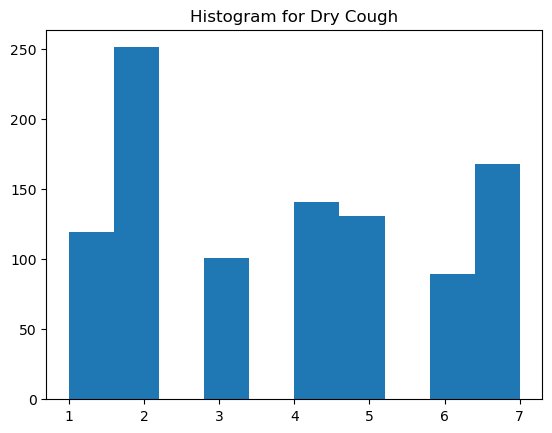

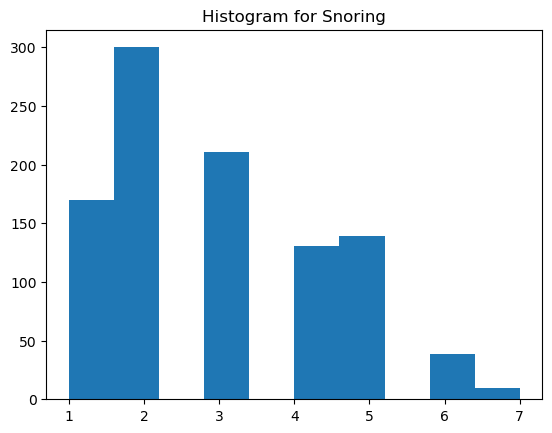

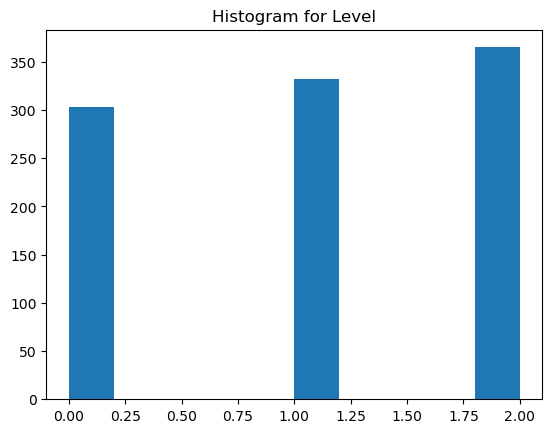

In [ ]:

for column in data.columns:
    plt.hist(data[column])
    plt.title(f'Histogram for {column}')
    plt.show()

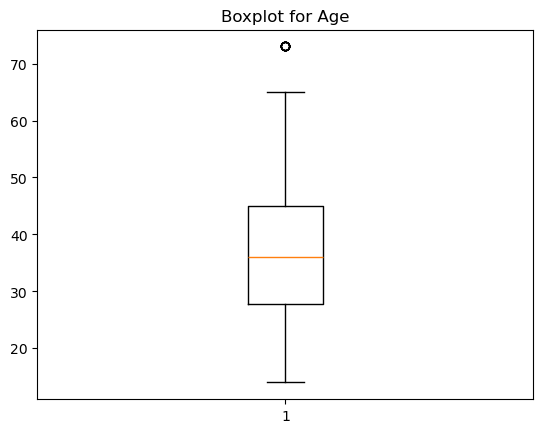

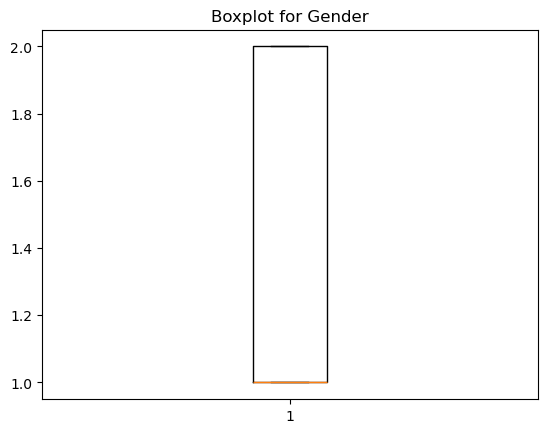

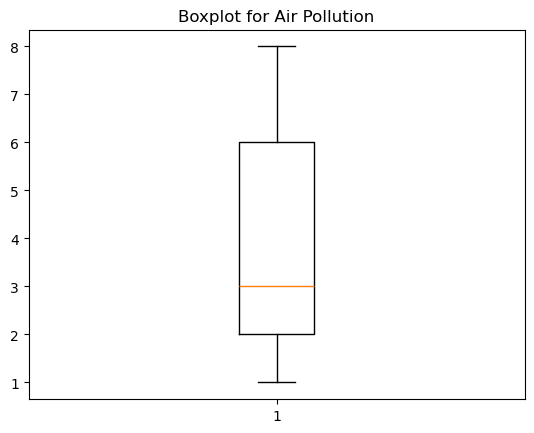

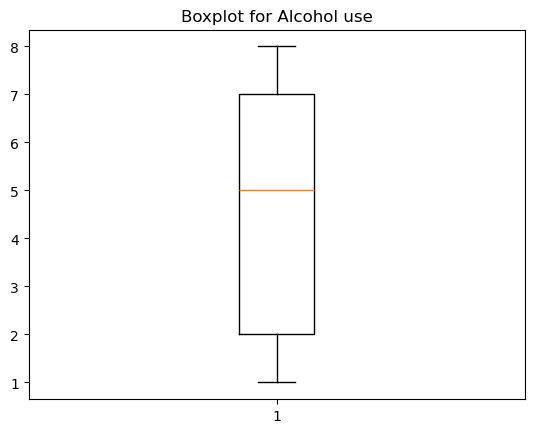

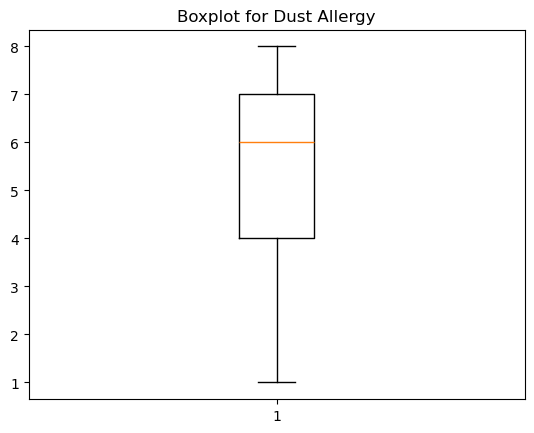

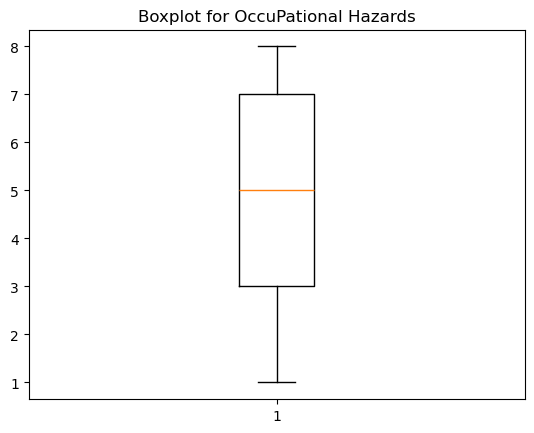

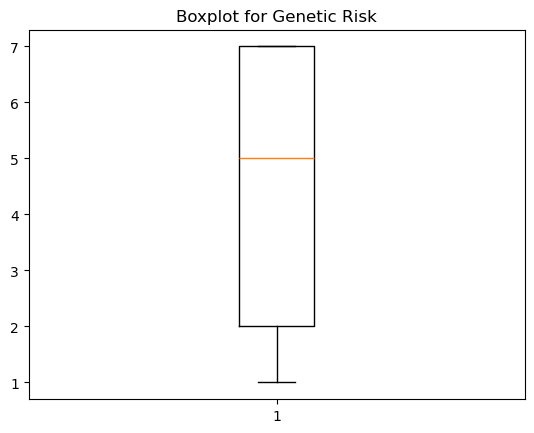

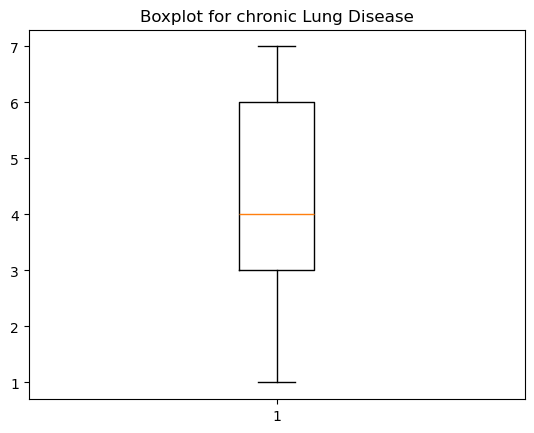

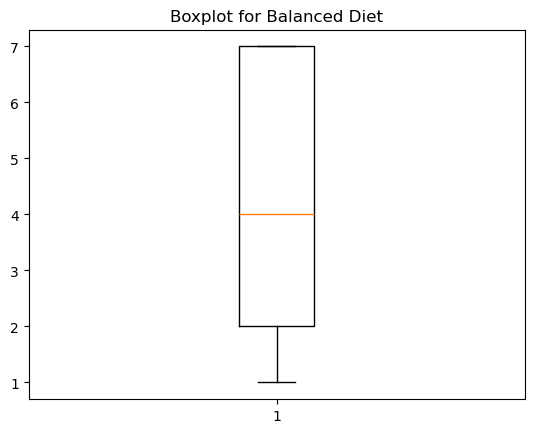

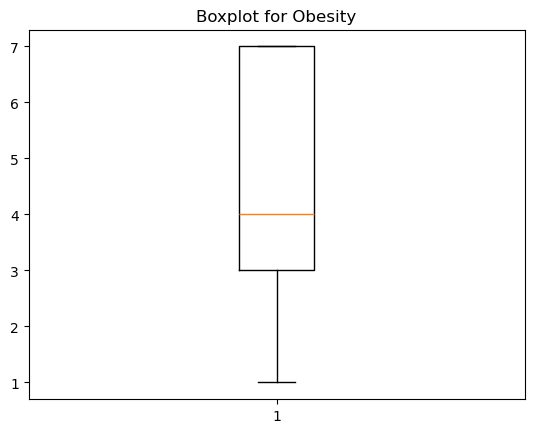

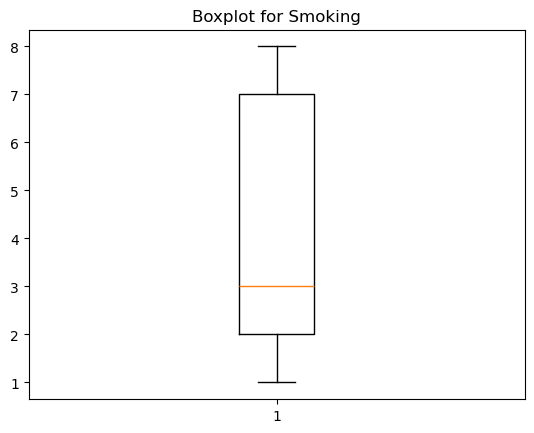

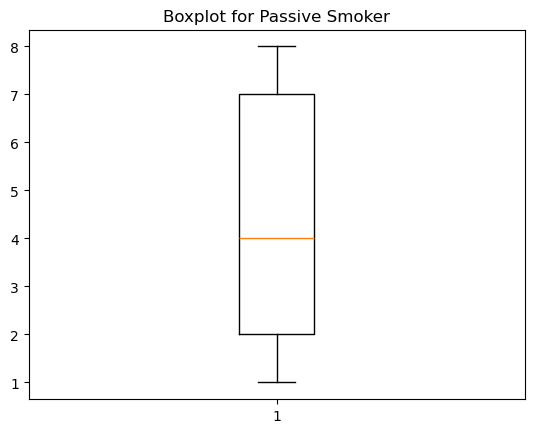

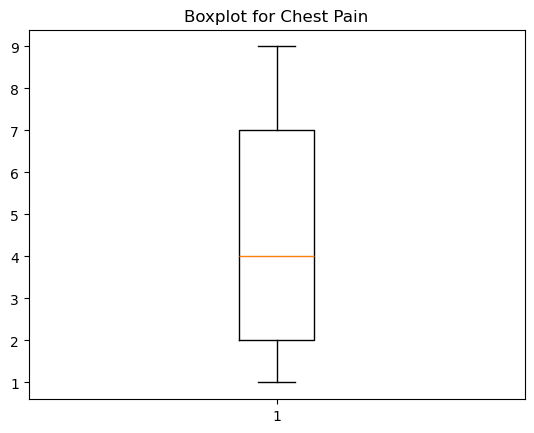

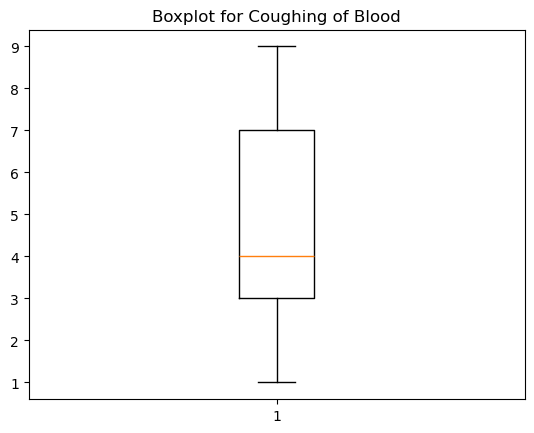

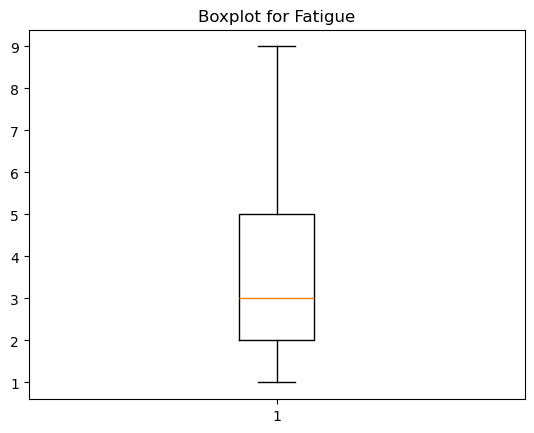

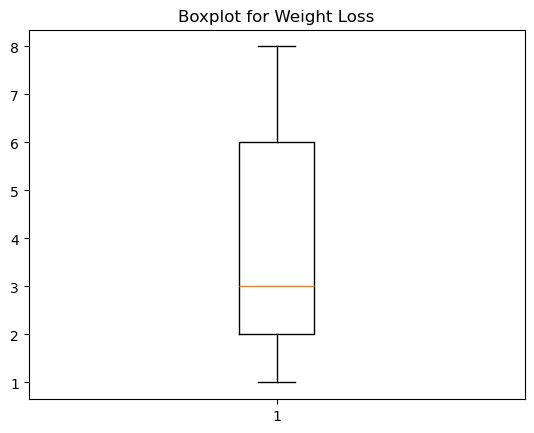

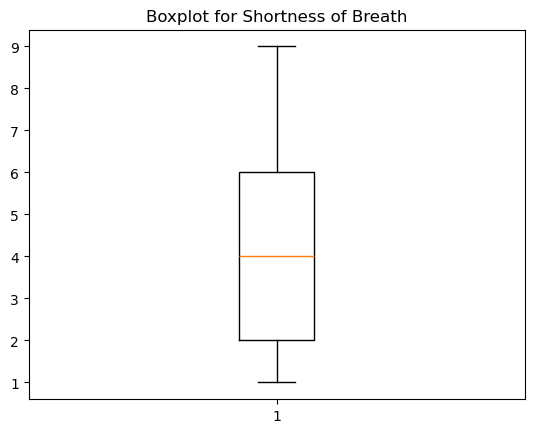

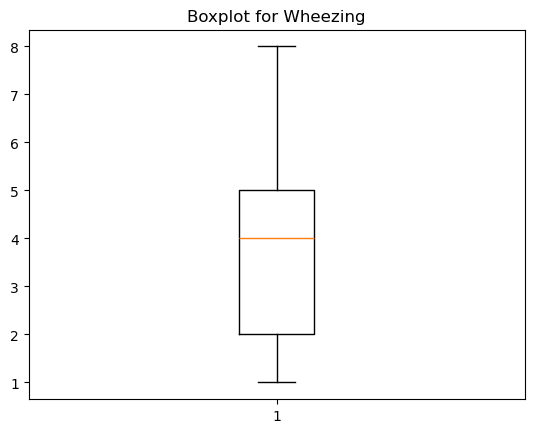

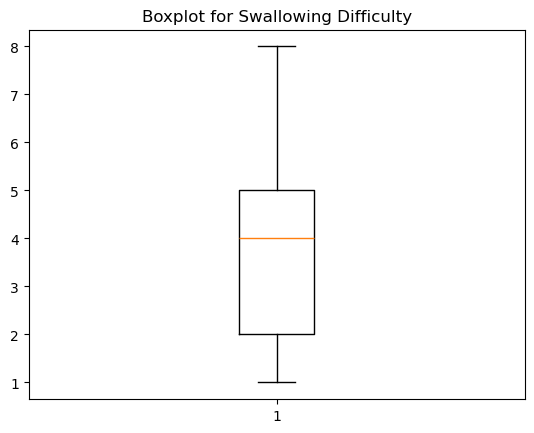

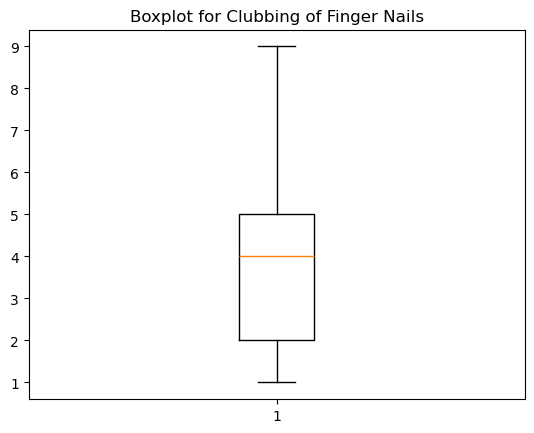

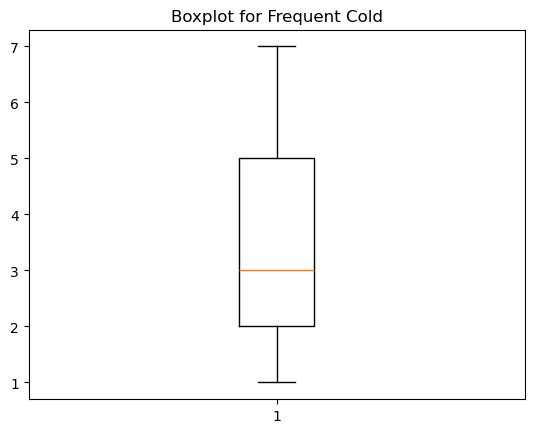

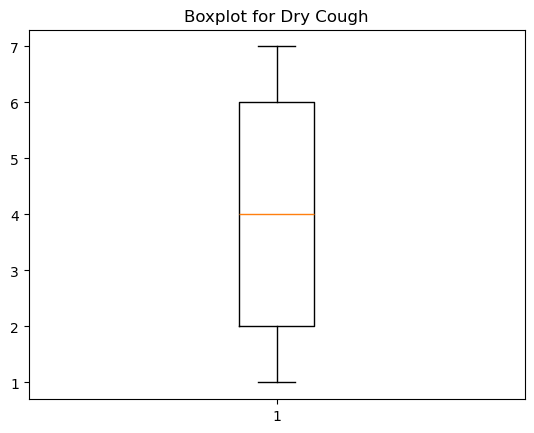

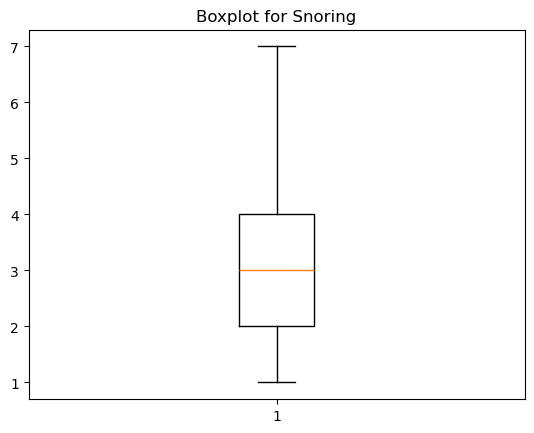

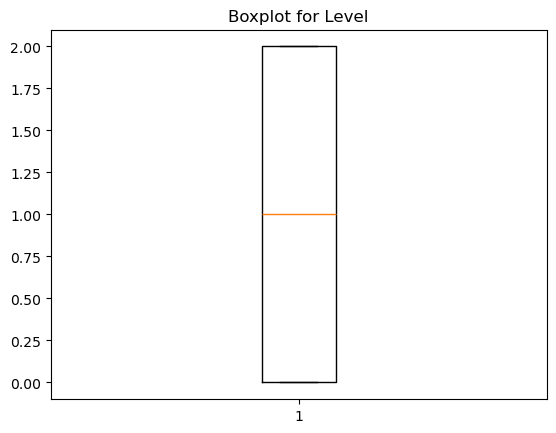

In [18]:
# Assuming 'data' is your DataFrame
for column in data.columns:
    plt.boxplot(data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [19]:
lower=14-(45-27.75)*1.5
upper=73+(45-27.75)*1.5
outlier1=data[data["Age"]<=lower]
outlier2=data[data["Age"]>=upper]

In [20]:
outlier1

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


In [21]:
outlier2

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


In [22]:
X=data.drop('Level',axis=1)
y=data['Level']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
gbm= GradientBoostingClassifier(n_estimators=20, learning_rate=0.01, max_depth=3,random_state=42)
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=20, random_state=42)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



<Axes: >

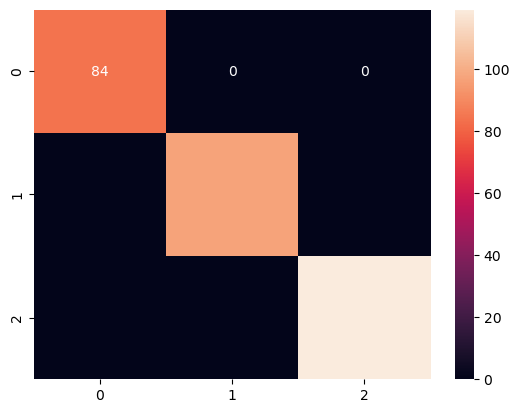

In [24]:
y_pred=gbm.predict(xtest)
accuracy = accuracy_score(ytest,y_pred)
print(f"Accuracy: {accuracy:.2f}")
confusion_matrix(ytest,y_pred)
print(classification_report(ytest,y_pred))
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='d')

In [25]:
X1=data[['Dust Allergy','Clubbing of Finger Nails','Age','Smoking','Wheezing','Alcohol use','Fatigue','Passive Smoker']]
y1=data['Level']

In [26]:
X1

,Dust Allergy,Clubbing of Finger Nails,Age,Smoking,Wheezing,Alcohol use,Fatigue,Passive Smoker
0,5,1,33,3,2,4,3,2
1,5,2,17,2,8,1,1,4
2,6,4,35,2,2,5,8,3
3,7,5,37,7,1,7,4,7
4,7,2,46,8,1,8,3,7
...,...,...,...,...,...,...,...,...
995,7,2,44,7,7,7,5,8
996,7,4,37,7,7,8,9,8
997,6,4,25,2,2,5,8,3
998,7,2,18,8,1,8,3,7


<Axes: >

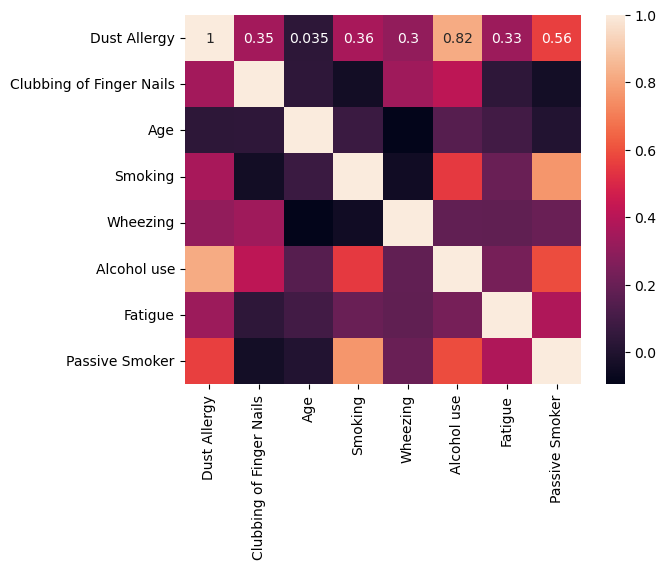

In [27]:
sns.heatmap(X1.corr(),annot=True)

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(X1,y,test_size=0.3,random_state=42)

In [29]:
gbm= GradientBoostingClassifier(n_estimators=20, learning_rate=0.01, max_depth=3,random_state=42)
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=20, random_state=42)

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        84
           1       0.98      1.00      0.99        97
           2       1.00      1.00      1.00       119

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



<Axes: >

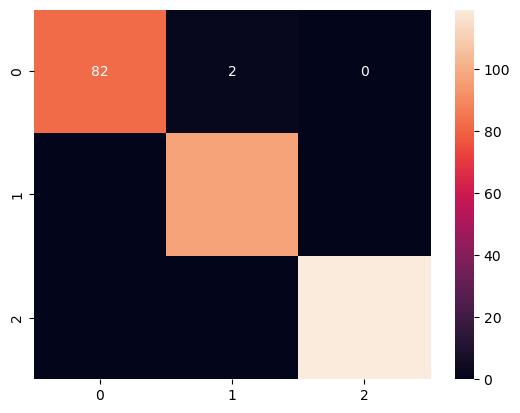

In [30]:
y_pred=gbm.predict(xtest)
accuracy = accuracy_score(ytest,y_pred)
print(f"Accuracy: {accuracy:.2f}")
confusion_matrix(ytest,y_pred)
print(classification_report(ytest,y_pred))
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='d')

In [31]:
# Sample data with two selective columns
columns=X1[['Alcohol use','Dust Allergy']]

# Convert data to numpy array
X = np.array(columns)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=1)  # Reduce to 1 component
X_pca = pca.fit_transform(X_scaled)

# Reduced feature matrix
X_reduced = X_pca

# Display original and reduced shape
print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (1000, 2)
Reduced shape: (1000, 1)


In [32]:
X1['Dust&Alcohol']=X_reduced
X1

C:\Users\chara\AppData\Local\Temp\ipykernel_24864\2489830491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Dust&Alcohol']=X_reduced


,Dust Allergy,Clubbing of Finger Nails,Age,Smoking,Wheezing,Alcohol use,Fatigue,Passive Smoker,Dust&Alcohol
0,5,1,33,3,2,4,3,2,0.210926
1,5,2,17,2,8,1,1,4,1.020848
2,6,4,35,2,2,5,8,3,-0.416201
3,7,5,37,7,1,7,4,7,-1.313303
4,7,2,46,8,1,8,3,7,-1.583277
...,...,...,...,...,...,...,...,...,...
995,7,2,44,7,7,7,5,8,-1.313303
996,7,4,37,7,7,8,9,8,-1.583277
997,6,4,25,2,2,5,8,3,-0.416201
998,7,2,18,8,1,8,3,7,-1.583277


In [33]:
X1=X1.drop(['Dust Allergy','Alcohol use'],axis=1)

In [34]:
X1

,Clubbing of Finger Nails,Age,Smoking,Wheezing,Fatigue,Passive Smoker,Dust&Alcohol
0,1,33,3,2,3,2,0.210926
1,2,17,2,8,1,4,1.020848
2,4,35,2,2,8,3,-0.416201
3,5,37,7,1,4,7,-1.313303
4,2,46,8,1,3,7,-1.583277
...,...,...,...,...,...,...,...
995,2,44,7,7,5,8,-1.313303
996,4,37,7,7,9,8,-1.583277
997,4,25,2,2,8,3,-0.416201
998,2,18,8,1,3,7,-1.583277


In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(X1,y1,test_size=0.3,random_state=42)

In [36]:
gbm= GradientBoostingClassifier(n_estimators=20, learning_rate=0.01, max_depth=3,random_state=42)
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=20, random_state=42)

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       1.00      1.00      1.00        97
           2       0.97      1.00      0.98       119

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



<Axes: >

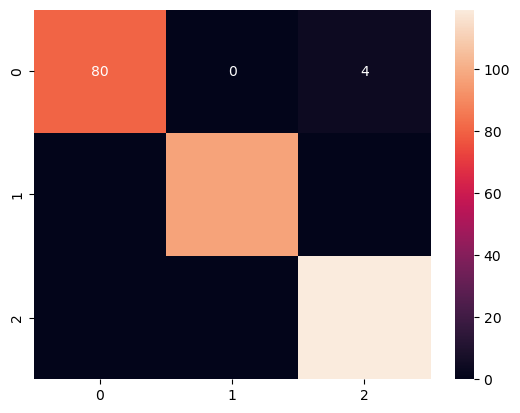

In [37]:
y_pred=gbm.predict(xtest)
accuracy = accuracy_score(ytest,y_pred)
print(f"Accuracy: {accuracy:.2f}")
confusion_matrix(ytest,y_pred)
print(classification_report(ytest,y_pred))
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='d')

In [38]:
import pickle
pickle_out=open("Model.pkl",mode="wb")
pickle.dump(gbm,pickle_out)
pickle_out.close()